# Elabora un modelo predictivo aplicando el algoritmo clasificador Bayesiano para resolver un problema de clasificación utilizando lenguaje Python

In [126]:
#Carga de librerias
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import warnings
# Activar las advertencias (warnings)
warnings.filterwarnings('always')
# Generar una advertencia
warnings.warn("Esta es una advertencia")
# Desactivar las advertencias (warnings)
warnings.filterwarnings('ignore')

C:\Users\hp\AppData\Local\Temp\ipykernel_19228\2387276631.py:12: UserWarning: Esta es una advertencia
  warnings.warn("Esta es una advertencia")


In [127]:
#Data loading and analysis
archivo_train =  pd.read_csv('train.csv')
train = pd.DataFrame(archivo_train)
archivo_test =  pd.read_csv('test.csv')
test = pd.DataFrame(archivo_test)
print(train.dtypes)
print(test.dtypes)

tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object
tBodyAcc-mean()-X       float64
tBodyAcc-mean()-Y       float64
tBodyAcc-mean()-Z       float64
tBodyAcc-std()-X        float64
tBodyAcc-std()-Y        float64
                         ...   
angle(X,gravityMean)    float64
angle(Y,gravityMean)    float64
angle(Z,gravityMean)    float64
subject                   int64
Activity                 object
Length: 563, dtype: object


Cantidad de registros que hay en cada actividad en el set de entrenamiento. 

(7352, 563)
(2947, 563)
col_0               count
Activity                 
LAYING               1407
SITTING              1286
STANDING             1374
WALKING              1226
WALKING_DOWNSTAIRS    986
WALKING_UPSTAIRS     1073
col_0               count
Activity                 
LAYING                537
SITTING               491
STANDING              532
WALKING               496
WALKING_DOWNSTAIRS    420
WALKING_UPSTAIRS      471


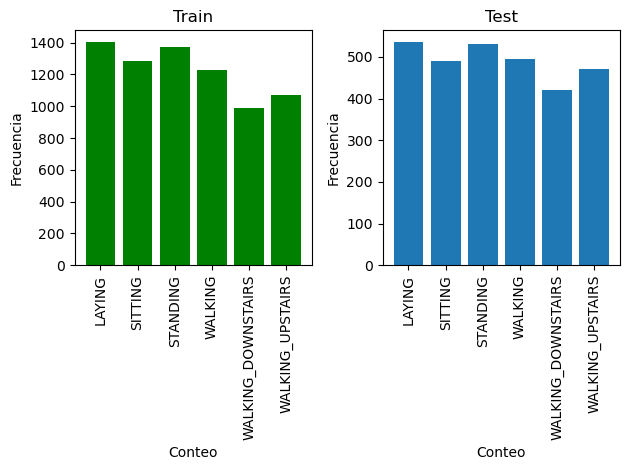

In [129]:
print(train.shape)
print(test.shape)
cont_1 = pd.crosstab(index= train.Activity, columns="count")
cont_2 = pd.crosstab(index= test.Activity, columns="count")

# Obtener las frecuencias y los nombres de cada columna
frecuencias_1 = cont_1["count"].values # Datos del primer histograma
frecuencias_2 = cont_2["count"].values # Datos del segundo histograma
nombres_columnas = cont_1.index.tolist()

# Crear una nueva figura y configurar subplots
fig, axs = plt.subplots(1, 2, tight_layout=True)

# Digrama de Barras 1
axs[0].bar(cont_1.index.tolist(),cont_1["count"].values, color = "green")
axs[0].set_title('Train')
axs[0].set_xlabel('Conteo')
axs[0].set_ylabel('Frecuencia')
axs[0].set_xticklabels(nombres_columnas, rotation=90)
# Digrama de Barras 2
axs[1].bar(cont_2.index.tolist(),cont_2["count"].values)
axs[1].set_title('Test')
axs[1].set_xlabel('Conteo')
axs[1].set_ylabel('Frecuencia')
axs[1].set_xticklabels(nombres_columnas, rotation=90)

# Mostrar el histograma
plt.tight_layout()
plt.show()

Accuracy: 0.6744336569579288
Confusion Matrix:
[[344 246   0   0   0   7]
 [  7 512  30   0   0  14]
 [  0 415 126   0   0   6]
 [  0   0   0 391  62  86]
 [  0   0   0  24 325  71]
 [  0   0   0   8  30 386]]


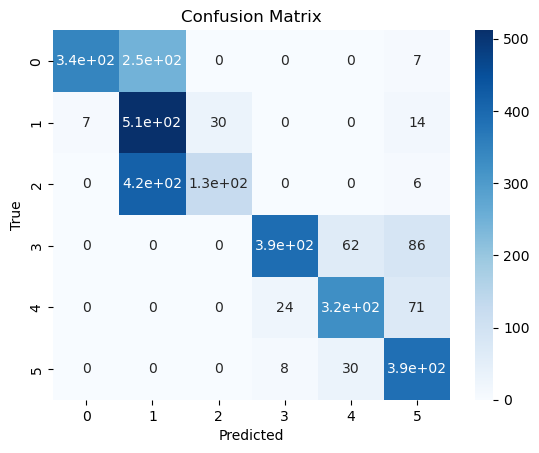

In [133]:
from sklearn import preprocessing

# Separar las características (X) y las etiquetas (y) en los conjuntos de entrenamiento y prueba
X_train = train.drop('Activity', axis=1)
y_train = train['Activity']
X_test = test.drop('Activity', axis=1)
y_test = test['Activity']

# Realizar la preprocesamiento, por ejemplo, estandarizar las características
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Plot the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Combinación de parámetros y obtenga el modelo con dichos parámetros.

In [138]:
from sklearn.model_selection import cross_val_score
#unir los dataframe
df = pd.concat([train, test], ignore_index=True)
X=df.drop('Activity', axis=1)
y= df['Activity']

# Perform cross-validation
scores = cross_val_score(
    classifier, X, y, cv=10
)

display("Cross-Validation Scores:", scores)

mean_score = scores.mean()
std_score = scores.std()
display("Average Score:", mean_score)
display("Std Score:", std_score)


'Cross-Validation Scores:'

array([0.76699029, 0.69029126, 0.58252427, 0.75436893, 0.68737864,
       0.70582524, 0.78932039, 0.79514563, 0.82135922, 0.70942663])

'Average Score:'

0.730263051128912

'Std Score:'

0.06649882780473701

La precisión mostrada anteriormente es consistentemente alta (valores medianamente altos sobre la media de los scores y con baja desviación estándar 0.06),
lo que indica que el modelo está funcionando bien.